## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.covariance import MinCovDet
from scipy.stats import chi2

In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [5]:
def calcular_imeca(datos):
  datos["O3_PPM"]=datos["O3"].apply(lambda x: x/1000)
  datos["NO2_PPM"]=datos["NO2"].apply(lambda x: x/1000)
  datos["SO2_PPM"]=datos["SO2"].apply(lambda x: x/1000)
  datos["CO_IMECA"]=''
  datos["SO2_IMECA"]=''
  datos["NO2_IMECA"]=''
  datos["O3_IMECA"]=''
  datos["PM2.5_IMECA"]=''
  datos["PM10_IMECA"]=''

  for i in datos.index:
     datos.loc[i,"CO_IMECA"]=datos.loc[i,"CO"]*100/11
     datos.loc[i,"SO2_IMECA"]=datos.loc[i,"SO2_PPM"]*100/0.11
     datos.loc[i,"NO2_IMECA"]=datos.loc[i,"NO2_PPM"]*100/0.21
     if datos.loc[i,"O3_PPM"]>=0 and datos.loc[i,"O3_PPM"]<=0.070:
      datos.loc[i,"O3_IMECA"]=714.29*datos.loc[i,"O3_PPM"]

     if datos.loc[i,"O3_PPM"]>=0.071 and datos.loc[i,"O3_PPM"]<=0.095:
      datos.loc[i,"O3_IMECA"]=2041.67*(datos.loc[i,"O3_PPM"] - 0.071)+51

     if datos.loc[i,"O3_PPM"]>=0.096 and datos.loc[i,"O3_PPM"]<=0.154:
      datos.loc[i,"O3_IMECA"]=844.83*(datos.loc[i,"O3_PPM"] - 0.096) +101

     if datos.loc[i,"O3_PPM"]>=0.155 and datos.loc[i,"O3_PPM"]<=0.204:
      datos.loc[i,"O3_IMECA"]=1000*(datos.loc[i,"O3_PPM"] - 0.155) + 151

     if datos.loc[i,"O3_PPM"]>=0.205 and datos.loc[i,"O3_PPM"]<=0.404:
      datos.loc[i,"O3_IMECA"]= 497.49*(datos.loc[i,"O3_PPM"]-0.205) + 201

     if datos.loc[i,"O3_PPM"]>=0.405 and datos.loc[i,"O3_PPM"]<=0.504:
      datos.loc[i,"O3_IMECA"]=1000*(datos.loc[i,"O3_PPM"]-104)

     if datos.loc[i,"O3_PPM"]>=0.505 and datos.loc[i,"O3_PPM"]<=0.604:
      datos.loc[i,"O3_IMECA"]=1000*(datos.loc[i,"O3_PPM"]-104)

      #PM2.5
     if datos.loc[i,"PM2.5"]>=0 and datos.loc[i,"PM2.5"]<=12:
      datos.loc[i,"PM2.5_IMECA"]=4.17*datos.loc[i,"PM2.5"]

     if datos.loc[i,"PM2.5"]>=12.1 and datos.loc[i,"PM2.5"]<=45:
      datos.loc[i,"PM2.5_IMECA"]=1.49*(datos.loc[i,"PM2.5"] - 12.1) + 51

     if datos.loc[i,"PM2.5"]>=45.1 and datos.loc[i,"PM2.5"]<=97.4:
      datos.loc[i,"PM2.5_IMECA"]=0.94*(datos.loc[i,"PM2.5"] - 45.1) +101

     if datos.loc[i,"PM2.5"]>=97.5 and datos.loc[i,"PM2.5"]<=150.4:
      datos.loc[i,"PM2.5_IMECA"]=0.93*(datos.loc[i,"PM2.5"] - 97.5) + 151

     if datos.loc[i,"PM2.5"]>=150.5 and datos.loc[i,"PM2.5"]<=250.4:
      datos.loc[i,"PM2.5_IMECA"]=0.99*(datos.loc[i,"PM2.5"] - 150.5) + 201

     if datos.loc[i,"PM2.5"]>=250.5 and datos.loc[i,"PM2.5"]<=350.4:
      datos.loc[i,"PM2.5_IMECA"]=0.99*(datos.loc[i,"PM2.5"] - 250.5) + 301

     if datos.loc[i,"PM2.5"]>=350.5 and datos.loc[i,"PM2.5"]<=500.4:
      datos.loc[i,"PM2.5_IMECA"]=0.66*(datos.loc[i,"PM2.5"]-350.5)+ 401


    #PM10

     if datos.loc[i,"PM10"]>=0 and datos.loc[i,"PM10"]<=40:
      datos.loc[i,"PM10_IMECA"]=1.25*datos.loc[i,"PM10"]

     if datos.loc[i,"PM10"]>=41 and datos.loc[i,"PM10"]<=75:
      datos.loc[i,"PM10_IMECA"]=1.44*(datos.loc[i,"PM10"] - 41) + 51

     if datos.loc[i,"PM10"]>=76 and datos.loc[i,"PM10"]<=214:
      datos.loc[i,"PM10_IMECA"]=0.355*(datos.loc[i,"PM10"] - 76) +101

     if datos.loc[i,"PM10"]>=215 and datos.loc[i,"PM10"]<=354:
      datos.loc[i,"PM10_IMECA"]=0.353*(datos.loc[i,"PM10"] - 215) + 151

     if datos.loc[i,"PM10"]>=355 and datos.loc[i,"PM10"]<=424:
      datos.loc[i,"PM10_IMECA"]=(datos.loc[i,"PM10"]-355)*1.435 + 201

     if datos.loc[i,"PM10"]>=425 and datos.loc[i,"PM10"]<=504:
      datos.loc[i,"PM10_IMECA"]=(datos.loc[i,"PM10"]-425)*1.253 + 301

     if datos.loc[i,"PM10"]>=505 and datos.loc[i,"PM10"]<=604:
      datos.loc[i,"PM10_IMECA"]=datos.loc[i,"PM10"]-104

  return datos

In [6]:
def class_imeca(datos_imeca):
  # Índice Imeca
  Imeca = []
  sum = 0
  for i in range(len(datos_imeca)):
    for j in range(25):
      if(j>17):
        if(type(datos_imeca.iloc[i,j])==str):
          continue
        #print("imeca", datos_imeca.iloc[i,j])
        sum = sum + datos_imeca.iloc[i,j]
      #print("sum", sum)
    Imeca.append(sum)
    sum = 0

  #  Clasificación
  IMECA = []
  for k in range(len(Imeca)):
    if(Imeca[k]<51):
      IMECA.append("Bueno")
    elif(Imeca[k]>50 and Imeca[k]<101):
      IMECA.append("Satisfactorio")
    elif(Imeca[k]>100 and Imeca[k]<201):
      IMECA.append("Malo para la salud")
    elif(Imeca[k]>200 and Imeca[k]<301):
      IMECA.append("Peligroso-Alerta")
    elif(Imeca[k]>300 and Imeca[k]<401):
      IMECA.append("Peligroso-Aviso")
    elif(Imeca[k]>400 and Imeca[k]<501):
      IMECA.append("Peligroso-Emergencia")
    elif(Imeca[k]>500):
      IMECA.append("Daño significativo")

  NewData = datos_imeca.drop(['date','O3_PPM', 'NO2_PPM', 'SO2_PPM', 'CO_IMECA', 'SO2_IMECA', 'NO2_IMECA', 'O3_IMECA', 'PM2.5_IMECA', 'PM10_IMECA'], axis=1)
  NewData["IndiceIMECA"] = Imeca
  NewData['IMECA'] = IMECA

  return(NewData)

In [7]:
# Funcion para graficar histogramas

def graficar_histogramas(df):
    # Creamos una figura
    num_vars = len(df.columns)
    num_cols = 5
    num_rows = int(np.ceil(num_vars/num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

    # Graficamos cada variable y su funcion de densidad
    for i, column in enumerate(df.columns):
        ax = axes.flatten()[i]
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(column)

    # Eliminamos subplots vacios
    for i in range(num_vars, num_cols * num_rows):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


In [8]:
# Funcion para graficar boxplots
def graficar_boxplots(df):
    # Creamos una figura por cada variable
    num_vars = len(df.columns)
    num_cols = 5
    num_rows = int(np.ceil(num_vars/num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

    # Graficamos los boxplots
    for i, column in enumerate(df.columns):
        ax = axes.flatten()[i]
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(column)
    
    # Eliminamos subplots vacios
    for i in range(num_vars, num_cols * num_rows):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [9]:
# Funcion para graficas series de tiempo
def plot_time_series(df):

    num_vars = len(df.select_dtypes(include=[np.number]).columns)
    num_cols = 5
    num_rows = num_vars // num_cols + (1 if num_vars % num_cols else 0)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
        ax = axs.flatten()[i]
        ax.plot(df.index, df[column], label=column)
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Valor')
        ax.set_title(column)
        ax.legend()
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

In [10]:
# Funcion para calcular valores atipicos usando la distancia de mahalanobis

def robust_mahalanobis_outliers(X, alpha=0.01):
    """
    Identifica valores atípicos en los datos usando la distancia de Mahalanobis robusta.

    Parámetros:
    - X: DataFrame de pandas o matriz de numpy con los datos.
    - alpha: Nivel de significancia para el test de valores atípicos.

    Retorna:
    - outliers: Array de numpy con True en las posiciones de las observaciones atípicas y False en las demás.
    """
    # Calcular la matriz de covarianza y la media robusta
    mcd = MinCovDet().fit(X)
    cov = mcd.covariance_
    mean = mcd.location_

    # Calcular la pseudoinversa de la matriz de covarianza
    inv_cov = np.linalg.pinv(cov)

    # Calcular la distancia de Mahalanobis de cada observación a la media
    diffs = X - mean
    distances = np.sqrt(np.sum(np.dot(diffs, inv_cov) * diffs, axis=1))

    # Calcular el valor crítico
    p = X.shape[1]
    critical_value = chi2.ppf(1 - alpha, p)

    # Identificar observaciones atípicas
    outliers = distances > critical_value
    
    return outliers

In [11]:
from sklearn.preprocessing import RobustScaler

def robust_scaling(df):
    """
    Esta función estandariza un DataFrame usando RobustScaler de scikit-learn.

    :param df: DataFrame de pandas
    :return: DataFrame estandarizado
    """
    # Instanciar el escalador
    scaler = RobustScaler()
    
    # Ajustar y transformar los datos
    scaled_df = scaler.fit_transform(df)
    
    # Convertir el resultado en un DataFrame
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# Ejemplo de uso
# df_robust_scaled = robust_scaling(df)


**Funciones para los modelos.**

In [12]:
def discriminant_analysis(data):

  print(data['IMECA'].value_counts())

  # Visualización de los datos (Gráfica 1)
  lookup = {'Bueno': 'brown', 'Satisfactorio': 'purple', 'Malo para la salud': 'red', 'Peligroso-Alerta': 'green',
            'Peligroso-Aviso': 'orange', 'Peligroso-Emergencia': 'pink', 'Daño significativo': 'blue'}
  col_ind = [lookup[IMECA] for IMECA in data['IMECA']]
  plt.scatter(data['PM10'], data['IndiceIMECA'], c=col_ind, marker='o', edgecolor='gray')
  plt.xlabel('PM10')
  plt.ylabel('Indice Imeca')
  plt.show()

  # Ajuste del modelo de análisis discriminante lineal (LDA)
  X = data.drop(['IndiceIMECA', 'IMECA'], axis=1)
  y = data['IMECA']
  lda_model = LDA()
  lda_model.fit(X, y)
  print(lda_model)

  # Predicciones utilizando el modelo LDA
  predicted = lda_model.predict(X)
  #print(predicted[:5])

  # Visualización de los resultados (histogramas por clase)
  classes = data['IMECA'].unique()

  for class_name in classes:
      subset = lda_model.transform(X)[y == class_name]
      sns.histplot(data=subset[:, 0], kde=True, label=class_name)

  plt.title("Histograma de la función discriminante LD1")
  plt.legend()
  plt.show()

  for class_name in classes:
      subset = lda_model.transform(X)[y == class_name]
      sns.histplot(data=subset[:, 1], kde=True, label=class_name)

  plt.title("Histograma de la función discriminante LD2")
  plt.legend()
  plt.show()

  # Visualización de las separaciones usando los discriminantes lineales (Gráfica 3)
  plt.scatter(lda_model.transform(X)[:, 0], lda_model.transform(X)[:, 1], c=col_ind, marker='o', edgecolor='gray')
  plt.xlabel('LD1')
  plt.ylabel('LD2')
  plt.show()

  # Calidad de la predicción
  confusion_matrix = pd.crosstab(predicted, y)
  print(confusion_matrix)
  accuracy = np.mean(predicted == y)
  error_rate = 1 - accuracy
  print("Porcentaje de observaciones clasificadas erróneamente:", error_rate)


In [13]:
import matplotlib.pyplot as plt

def RLM(datos):
    X_independientes = datos.iloc[:,0:8] # Variables Independientes
    Y_dependiente = datos.iloc[:, 15] # Variable dependiente

    # Partición de datos para entrenamiento
    X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=1280)

    # Regresión
    modelo_rm = LinearRegression()
    modelo_rm.fit(X_entrena,Y_entrena)

    # Evaluación del modelo antes de predecir
    b0 = modelo_rm.intercept_

    # Coeficientes regresión
    coeficientes = modelo_rm.coef_

    # R2
    r2 = modelo_rm.score(X_entrena, Y_entrena)

    # Predicciones
    predicciones = modelo_rm.predict(X_valida)

    # Comparaciones
    comparaciones = pd.DataFrame(X_valida)
    comparaciones = comparaciones.assign(IMECA_Real = Y_valida)
    comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())

    #RMSE
    RMSE = np.sqrt(metrics.mean_squared_error(Y_valida, predicciones))

    # Imprimir diagrama de coeficientes
    plt.figure(figsize=(10,6))
    plt.bar(X_independientes.columns, coeficientes)
    plt.xlabel('Variables Independientes')
    plt.ylabel('Coeficiente')
    plt.title('Diagrama de Coeficientes')
    plt.show()

    return (coeficientes, r2, comparaciones, RMSE)

In [14]:
def clustering(datos):

  import seaborn as sns
  import pandas as pd
  import matplotlib.pyplot as plt
  from sklearn import metrics


  model = KMeans(n_clusters=7, random_state=42)
  model_kmeans= model.fit(datos.iloc[:,:-1])
  datos["Prediccion"]=model_kmeans.labels_
  display(datos)

  plt.figure(figsize=(15, 15))

  datos_frecuencia_plot=datos.drop(columns=["CO","NO2","NOX","O3","PRS","IMECA","RAINF","RH","SO2","SR","TOUT","WSR","WDR"])
  sns.pairplot(data=datos_frecuencia_plot, vars=datos_frecuencia_plot.columns[:-1], hue='Prediccion', palette='plasma')

  # Mostrar el gráfico
  plt.show()
  

  #Gráfica en 3D
  fig = plt.figure(figsize=(10,7))
  ax = fig.add_subplot(111, projection='3d')

  # Graficar los puntos coloreados por cluster
  ax.scatter(datos.iloc[:, 5], datos.iloc[:, 6],datos.iloc[:, -3], c=datos.iloc[:, -1], marker='o')

  # Agregar etiquetas de eje
  ax.set_xlabel('PM10')
  ax.set_ylabel('IMECA')
  ax.set_zlabel('NO', labelpad=10)
  ax.zaxis.set_label_coords(0.5, 0.5)


  ax.view_init(elev=5, azim=45)

  plt.show()

  # Contar la frecuencia de cada par (clase, cluster)
  frecuencia = datos.groupby(['Prediccion', 'IMECA']).size().reset_index(name='Frecuencia')

  # Crear un gráfico de barras para visualizar las frecuencias
  plt.figure(figsize=(6, 4))
  ax = plt.subplot()
  frecuencia.pivot(index='Prediccion', columns='IMECA', values='Frecuencia').plot(kind='bar', ax=ax,width=2)
  plt.title('Frecuencia de Clusters por Clase Original')
  plt.xlabel('Clase predicha')
  plt.ylabel('Frecuencia')
  plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.5, 1))

  plt.show()


  # Crear una tabla pivote para el heatmap
  pivot_table = frecuencia.pivot(index='Prediccion', columns='IMECA', values='Frecuencia').fillna(0)

  # Crear el heatmap
  plt.figure(figsize=(10, 6))
  sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')

  plt.title('Heatmap de Relación entre Clases y Clusters')
  plt.xlabel('Cluster')
  plt.ylabel('Clase Original')

  plt.show()

  dict_clases={'Peligroso-Emergencia':6, 'Peligroso-Aviso':2, 'Peligroso-Alerta':0,
       'Malo para la salud':4, 'Satisfactorio':5, 'Daño significativo':3,
       'Bueno':1}

  datos["IMECA"]=datos['IMECA'].replace(dict_clases)


  #Evaluación del modelo
  predicciones = datos['IMECA']
  clusters_reales = datos['Prediccion']

  # Calcular el Índice de Silueta
  silhouette_score = metrics.silhouette_score(datos, predicciones)

  # Calcular el Coeficiente de Calinski-Harabasz
  ch_score = metrics.calinski_harabasz_score(datos, predicciones)



  return "Silhouette: "+str(silhouette_score)+' - '+"Calinski-Harabasz: "+str(ch_score)

In [15]:
def factor_analysis(df, n_components=5):
    """
    Esta función realiza un análisis factorial y PCA en un DataFrame,
    y luego crea mapas de calor, un biplot y un scree plot para comparar los componentes resultantes.

    :param df: DataFrame de pandas
    :param n_components: número de componentes para el análisis
    :return: None
    """

    # Calcular KMO
    kmo_all, kmo_model = calculate_kmo(df)
    print(f"KMO: {kmo_model}")

    # Test de Bartlett
    chi_square_value, p_value = calculate_bartlett_sphericity(df)
    print(f"Test de Bartlett: chi-square = {chi_square_value}, p-value = {p_value}")

    # Métodos a comparar
    methods = [
        ("PCA", PCA()),
        ("Unrotated FA", FactorAnalysis()),
        ("Varimax FA", FactorAnalysis(rotation="varimax")),
    ]

    # Configuración de la visualización
    fig, axes = plt.subplots(ncols=len(methods), figsize=(15, 8), sharey=True)

    # Bucle para cada método
    for ax, (method, fa) in zip(axes, methods):
        fa.set_params(n_components=n_components)
        fa.fit(df)

        components = fa.components_.T
        print("\n\n %s :\n" % method)
        print(components)

        vmax = np.abs(components).max()
        ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
        ax.set_yticks(np.arange(len(df.columns)))
        ax.set_yticklabels(df.columns)
        ax.set_title(str(method))
        ax.set_xticks([0, 1, 2, 3, 4])
        ax.set_xticklabels(["CP1", "CP2", "CP3", "CP4", "CP5"])

    # Biplot con puntos
    fa = FactorAnalysis(n_components=2).fit(df)
    components = fa.components_.T
    transformed_data = fa.transform(df)  # Transformar datos al espacio de componentes

    plt.figure(figsize=(8, 6))
    
    # Agregar puntos de las observaciones
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.2)
    
    # Graficar flechas por encima de las observaciones
    for i, var in enumerate(df.columns):
        plt.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5)
        plt.text(components[i, 0]*1.1, components[i, 1]*1.1, var, color='black', ha='center', va='center')
    
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Biplot con puntos')
    plt.grid(True)

    # Biplot sin puntos
    plt.figure(figsize=(8, 6))
    for i, var in enumerate(df.columns):
        plt.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5)
        plt.text(components[i, 0]*1.1, components[i, 1]*1.1, var, color='black', ha='center', va='center')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Biplot sin puntos')
    plt.grid(True)


    # Scree plot
    ev, _ = np.linalg.eig(fa.get_covariance())
    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, df.shape[1]+1), ev)
    plt.plot(range(1, df.shape[1]+1), ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()

    plt.tight_layout()
    plt.show()


## **Analisis Descriptivo**

In [16]:
# Cargamos los datos
database = pd.read_csv('data/OBISPADO.csv')
database.head(3)

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,01/01/2022 00:00,2.60,3.5,44.9,48.5,15.0,134.0,91.00,705.5,0.0,46.0,5.3,0.0,21.37,3.4,267.0
1,01/01/2022 01:00,2.23,2.9,32.9,36.0,19.0,141.0,112.61,705.2,0.0,48.0,6.1,0.0,20.83,3.3,259.0
2,01/01/2022 02:00,1.99,2.9,27.6,30.7,21.0,117.0,92.46,705.1,0.0,46.0,5.8,0.0,20.52,5.9,233.0


In [17]:
# Dimensiones del dataset
database.shape

(14255, 16)

In [18]:
# Descripcion de variables
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14255 entries, 0 to 14254
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    14255 non-null  object 
 1   CO      13983 non-null  float64
 2   NO      13482 non-null  float64
 3   NO2     14032 non-null  float64
 4   NOX     14033 non-null  float64
 5   O3      13801 non-null  float64
 6   PM10    13962 non-null  float64
 7   PM2.5   13002 non-null  float64
 8   PRS     14029 non-null  float64
 9   RAINF   14043 non-null  float64
 10  RH      13963 non-null  float64
 11  SO2     13126 non-null  float64
 12  SR      14122 non-null  float64
 13  TOUT    14043 non-null  float64
 14  WSR     14042 non-null  float64
 15  WDR     14026 non-null  float64
dtypes: float64(15), object(1)
memory usage: 1.7+ MB


In [19]:
# Descripcion de variables
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14255 entries, 0 to 14254
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    14255 non-null  object 
 1   CO      13983 non-null  float64
 2   NO      13482 non-null  float64
 3   NO2     14032 non-null  float64
 4   NOX     14033 non-null  float64
 5   O3      13801 non-null  float64
 6   PM10    13962 non-null  float64
 7   PM2.5   13002 non-null  float64
 8   PRS     14029 non-null  float64
 9   RAINF   14043 non-null  float64
 10  RH      13963 non-null  float64
 11  SO2     13126 non-null  float64
 12  SR      14122 non-null  float64
 13  TOUT    14043 non-null  float64
 14  WSR     14042 non-null  float64
 15  WDR     14026 non-null  float64
dtypes: float64(15), object(1)
memory usage: 1.7+ MB


In [20]:
# Seleccionamos las columnas numericas
database_num = database.select_dtypes(include = ['float64', 'int64'])
database_num

# Medidas estadisticas
database_num.describe()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
count,13983.000000,13482.000000,14032.000000,14033.000000,13801.000000,13962.000000,13002.000000,14029.000000,14043.0,13963.000000,13126.000000,14122.000000,14043.000000,14042.000000,14026.000000
mean,1.674502,8.444444,16.763184,25.171318,26.653793,64.193361,24.863623,711.391019,0.0,51.988613,5.175065,0.191822,22.909333,8.213132,102.111008
std,0.748087,12.529208,11.466253,20.849635,19.196565,34.525622,14.229094,3.599381,0.0,20.374335,2.855878,0.286056,7.498093,3.891121,86.551181
min,0.070000,0.600000,0.400000,2.700000,1.000000,3.000000,0.000000,698.700000,0.0,1.000000,0.500000,0.000000,-1.890000,0.700000,1.000000
25%,1.150000,2.500000,7.900000,10.900000,12.000000,41.000000,14.892500,709.000000,0.0,36.000000,3.200000,0.001000,18.270000,5.100000,47.000000
50%,1.510000,3.600000,14.200000,18.700000,23.000000,57.000000,21.680000,711.000000,0.0,53.000000,4.800000,0.008000,23.790000,7.800000,72.000000
75%,2.030000,8.700000,22.600000,31.900000,37.000000,78.000000,31.417500,713.300000,0.0,69.000000,6.100000,0.319000,28.040000,10.800000,117.000000
max,4.940000,166.600000,89.100000,186.800000,164.000000,735.000000,120.100000,724.900000,0.0,92.000000,73.900000,1.057000,41.470000,24.800000,360.000000


In [21]:
# Calculamos la moda de cada variable
df_mode = pd.DataFrame(database_num.mode().iloc[0]).T
# Calculamos la simetria de cada variable
df_kew = pd.DataFrame(database_num.skew()).T
# Calculamos la curtosis de cada variable
df_kurtosis = pd.DataFrame(database_num.kurtosis()).T
# Calculamos el rango de cada variable
df_range = pd.DataFrame(database_num.max() - database_num.min()).T

# Concatenamos los dataframes
database_medidas = pd.concat([df_mode, df_kew, df_kurtosis, df_range], ignore_index=True)
database_medidas.index = ['Moda', 'Simetria', 'Curtosis', 'Rango']
database_medidas

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
Moda,1.190000,2.300000,6.200000,10.000000,4.000000,46.000000,15.000000,710.600000,0.0,55.000000,3.000000,0.001000,24.070000,5.700000,51.000000
Simetria,0.939857,4.344122,1.386037,2.227350,1.243572,2.734062,1.605643,0.576322,0.0,-0.142648,3.643205,1.324647,-0.413811,0.479069,1.484121
Curtosis,0.489480,27.810392,2.656273,7.009868,2.279016,21.675635,4.159228,0.633381,0.0,-0.886186,40.216179,0.327957,-0.158395,-0.331564,1.287270
Rango,4.870000,166.000000,88.700000,184.100000,163.000000,732.000000,120.100000,26.200000,0.0,91.000000,73.400000,1.057000,43.360000,24.100000,359.000000


## **Visualizaciones.**

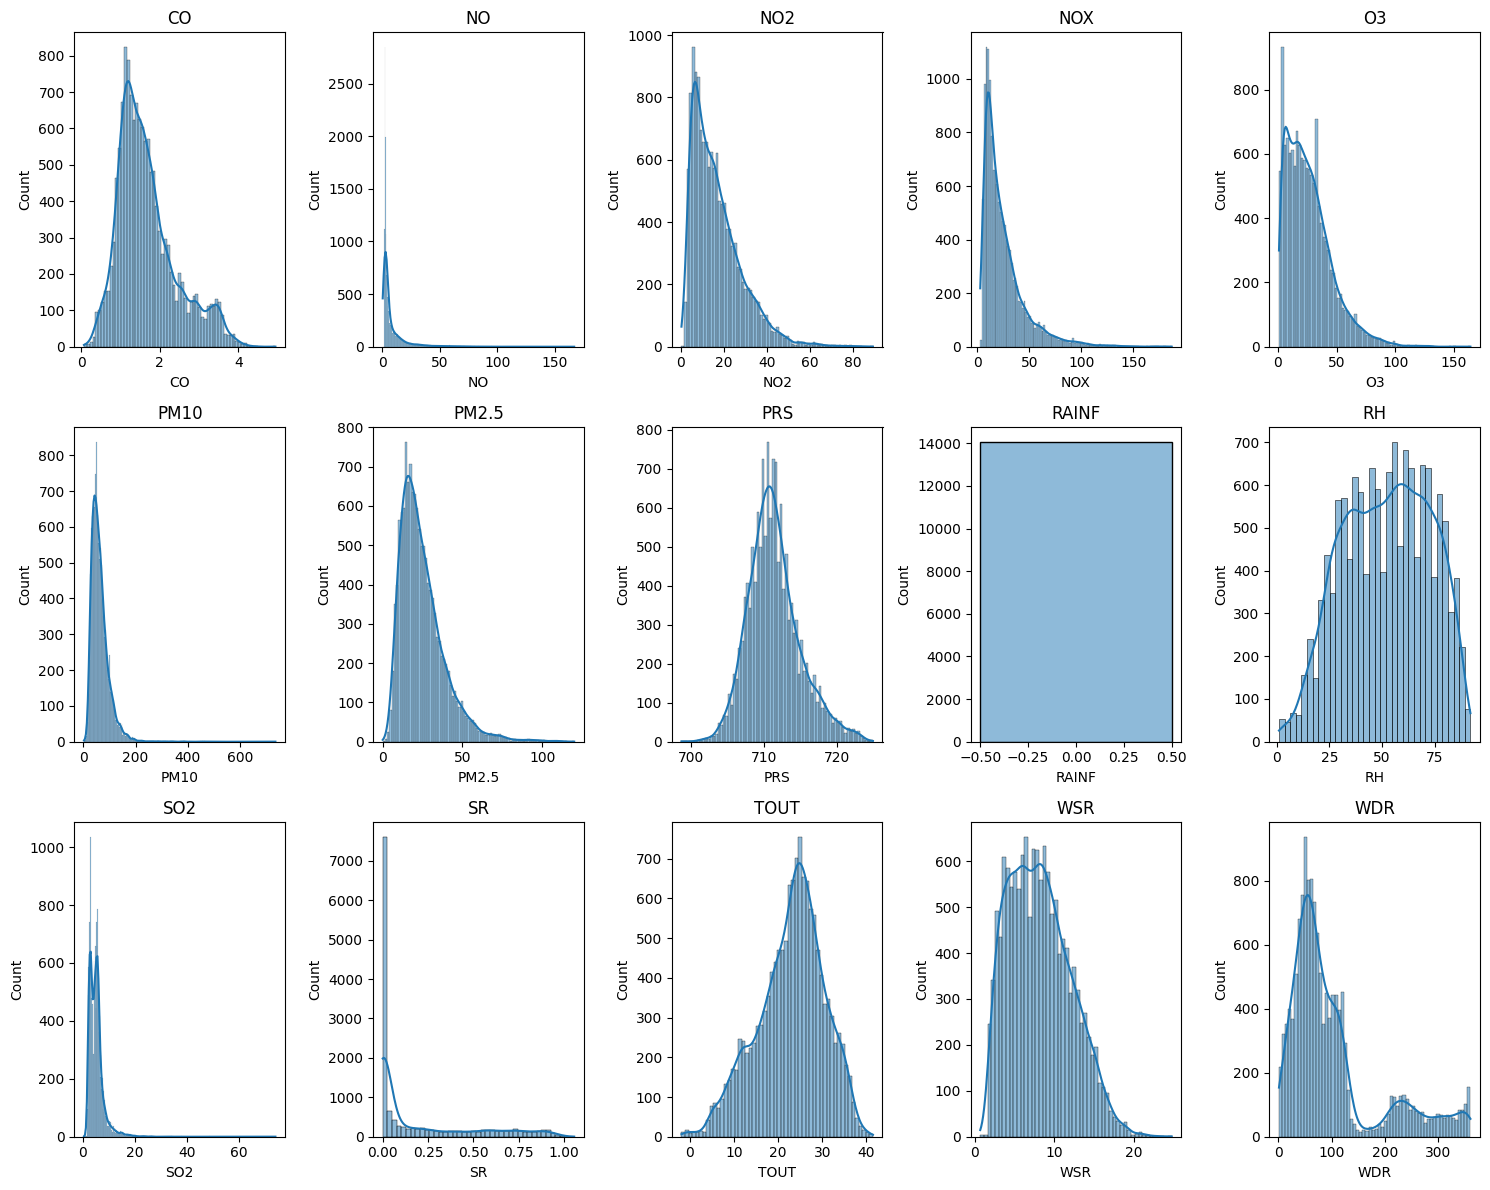

In [22]:
# LLamamos a la funcion para graficar histogramas
graficar_histogramas(database_num)

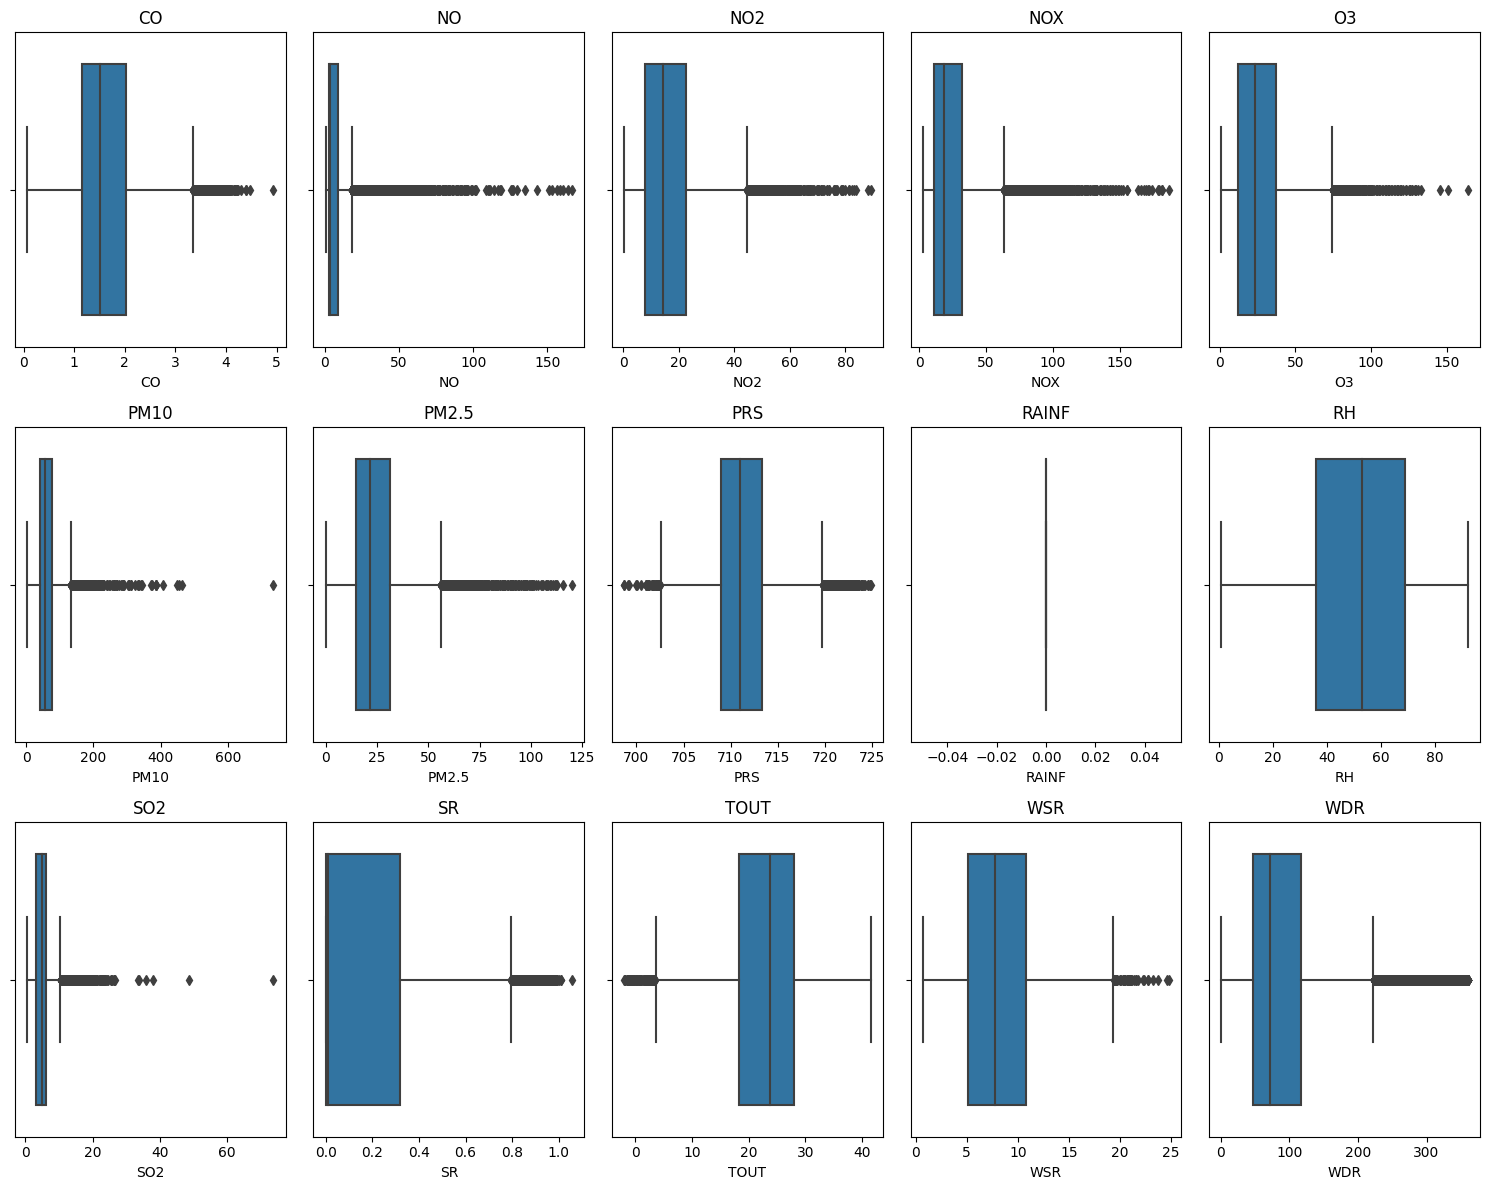

In [23]:
# Graficamos los boxplots
graficar_boxplots(database_num)

In [24]:
# Correlacion entre variables
database_num_corr = database_num.corr()
database_num_corr.style.background_gradient(cmap = 'Blues')

c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
CO,1.000000,0.184823,0.202275,0.214137,-0.057697,0.206256,0.299603,-0.215036,nan,0.074756,0.158818,0.038964,0.024863,-0.062105,0.036276
NO,0.184823,1.000000,0.526724,0.885558,-0.295768,0.311285,0.397512,0.083968,nan,0.115887,0.181756,-0.002428,-0.233875,-0.333235,0.143752
NO2,0.202275,0.526724,1.000000,0.864804,-0.293813,0.478875,0.569783,0.077909,nan,-0.000762,0.321153,-0.016500,-0.355650,-0.538740,0.252003
NOX,0.214137,0.885558,0.864804,1.000000,-0.336201,0.450460,0.549693,0.091156,nan,0.064786,0.284378,-0.003152,-0.330775,-0.490342,0.223959
O3,-0.057697,-0.295768,-0.293813,-0.336201,1.000000,0.119427,-0.000550,-0.211895,nan,-0.561923,0.124994,0.604540,0.518288,0.550034,-0.209487
PM10,0.206256,0.311285,0.478875,0.450460,0.119427,1.000000,0.630352,-0.152228,nan,-0.276397,0.259587,0.259462,0.022407,-0.045552,0.079326
PM2.5,0.299603,0.397512,0.569783,0.549693,-0.000550,0.630352,1.000000,-0.161161,nan,0.081301,0.266394,0.152565,-0.068860,-0.273133,0.118046
PRS,-0.215036,0.083968,0.077909,0.091156,-0.211895,-0.152228,-0.161161,1.000000,nan,0.154605,0.060294,-0.098596,-0.658908,-0.177634,-0.086748
RAINF,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
RH,0.074756,0.115887,-0.000762,0.064786,-0.561923,-0.276397,0.081301,0.154605,nan,1.000000,-0.216759,-0.370556,-0.395146,-0.448402,-0.029295


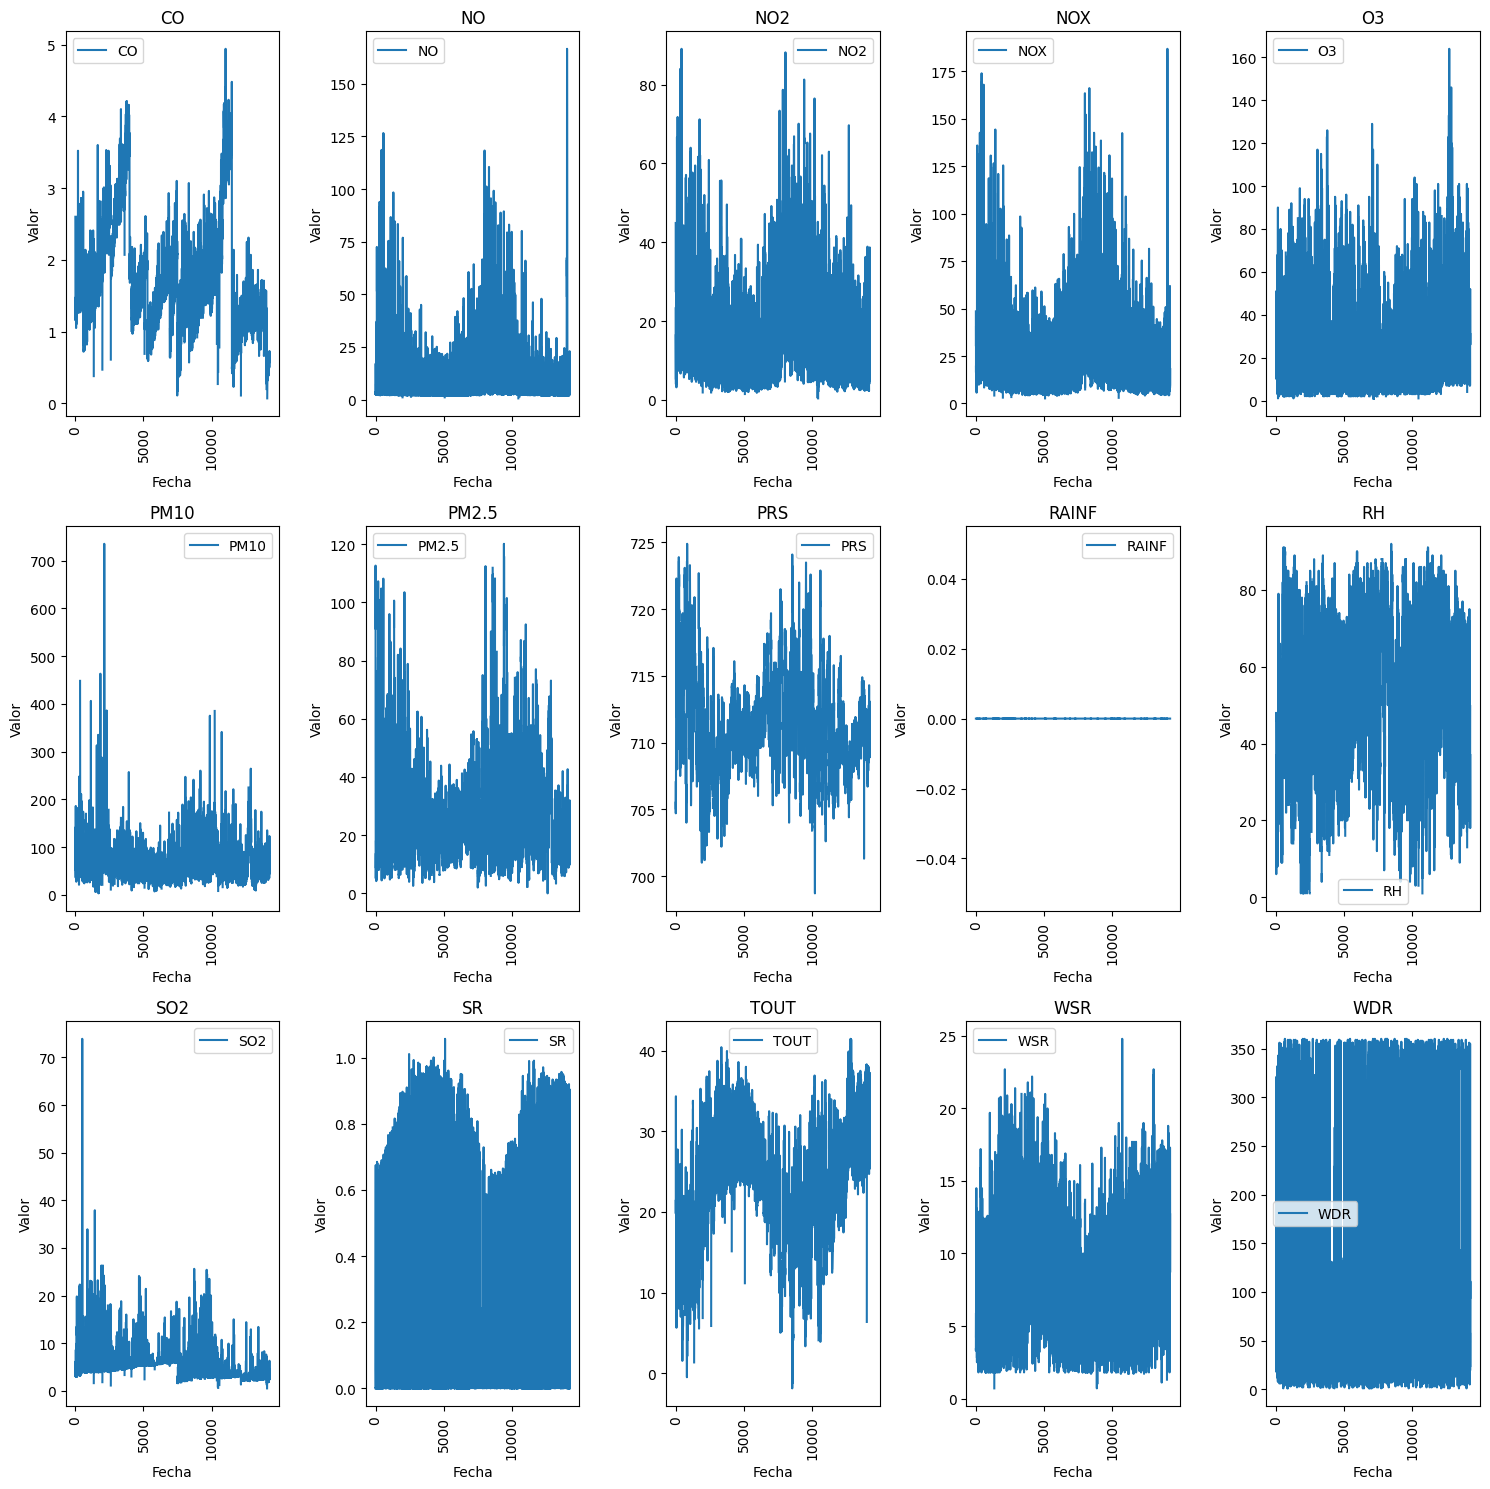

In [25]:
# Graficamos las series de tiempo
# Convertimos la columna en tipo de dato datetime
plot_time_series(database)

## **Limpieza**

In [26]:
# Revisamos los valores faltantes
database.isna().sum()

date        0
CO        272
NO        773
NO2       223
NOX       222
O3        454
PM10      293
PM2.5    1253
PRS       226
RAINF     212
RH        292
SO2      1129
SR        133
TOUT      212
WSR       213
WDR       229
dtype: int64

In [27]:
# Eliminamos las filas con valores faltantes
database.dropna(inplace=True)
database.isna().sum()

date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64

In [28]:
# Revisamos los valores duplicados
database.duplicated().sum()

0

In [29]:
# Eliminamos las filas duplicadas
database.drop_duplicates(inplace=True)
database.duplicated().sum()

0

In [30]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11333 entries, 0 to 14254
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11333 non-null  object 
 1   CO      11333 non-null  float64
 2   NO      11333 non-null  float64
 3   NO2     11333 non-null  float64
 4   NOX     11333 non-null  float64
 5   O3      11333 non-null  float64
 6   PM10    11333 non-null  float64
 7   PM2.5   11333 non-null  float64
 8   PRS     11333 non-null  float64
 9   RAINF   11333 non-null  float64
 10  RH      11333 non-null  float64
 11  SO2     11333 non-null  float64
 12  SR      11333 non-null  float64
 13  TOUT    11333 non-null  float64
 14  WSR     11333 non-null  float64
 15  WDR     11333 non-null  float64
dtypes: float64(15), object(1)
memory usage: 1.5+ MB


In [31]:
# Calculamos los valores atipicos con la distancia de mahalanobis
outliers = robust_mahalanobis_outliers(database.select_dtypes(include=["float64"]))
np.sum(outliers)

c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


26

In [32]:
# Eliminamos las filas con valores atipicos
database = database[~outliers]
database.shape

(11307, 16)

## **Calulamos el IMECA**

In [33]:
database_imeca=calcular_imeca(database)
database = class_imeca(database_imeca)
database

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,IndiceIMECA,IMECA
0,2.60,3.5,44.9,48.5,15.0,134.0,91.00,705.5,0.0,46.0,5.3,0.000,21.37,3.4,267.0,326.291148,Peligroso-Aviso
1,2.23,2.9,32.9,36.0,19.0,141.0,112.61,705.2,0.0,48.0,6.1,0.000,20.83,3.3,259.0,344.189758,Peligroso-Aviso
2,1.99,2.9,27.6,30.7,21.0,117.0,92.46,705.1,0.0,46.0,5.8,0.000,20.52,5.9,233.0,312.585784,Peligroso-Aviso
6,1.55,2.8,16.4,19.4,22.0,71.0,39.01,704.9,0.0,37.0,4.9,0.000,20.05,4.3,235.0,227.370158,Peligroso-Alerta
7,1.41,2.9,13.5,16.5,21.0,59.0,26.40,705.3,0.0,31.0,4.6,0.000,21.15,5.1,222.0,187.660261,Malo para la salud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14250,0.57,3.6,10.8,14.6,37.0,48.0,13.26,708.9,0.0,19.0,3.5,0.030,36.24,15.1,68.0,153.747124,Malo para la salud
14251,0.59,2.9,14.0,17.1,31.0,44.0,11.99,709.3,0.0,21.0,2.6,0.002,35.08,13.2,80.0,141.857829,Malo para la salud
14252,0.61,2.7,15.7,18.6,26.0,47.0,13.26,709.8,0.0,22.0,2.5,0.000,34.23,8.7,100.0,146.236812,Malo para la salud
14253,0.62,2.5,11.9,14.7,28.0,48.0,11.72,710.2,0.0,25.0,2.4,0.000,33.61,8.8,111.0,143.439768,Malo para la salud


In [34]:
# Ejemplo de uso
database_robust_scaled = robust_scaling(database.iloc[:, 0:15])
database_robust_scaled['IndiceIMECA'] = database['IndiceIMECA']
database_robust_scaled['IMECA'] = database['IMECA']
database_robust_scaled

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,IndiceIMECA,IMECA
0,1.227273,-0.016949,2.054422,1.399038,-0.346154,2.027027,4.145946,-1.309524,0.0,-0.15625,0.172414,-0.070130,-0.275967,-0.793103,2.800000,326.291148,Peligroso-Aviso
1,0.806818,-0.118644,1.238095,0.798077,-0.192308,2.216216,5.443844,-1.380952,0.0,-0.09375,0.448276,-0.070130,-0.330957,-0.810345,2.685714,344.189758,Peligroso-Aviso
2,0.534091,-0.118644,0.877551,0.543269,-0.115385,1.567568,4.233634,-1.404762,0.0,-0.15625,0.344828,-0.070130,-0.362525,-0.362069,2.314286,312.585784,Peligroso-Aviso
3,0.034091,-0.135593,0.115646,0.000000,-0.076923,0.324324,1.023423,-1.452381,0.0,-0.43750,0.034483,-0.070130,-0.410387,-0.637931,2.342857,NaN,NaN
4,-0.125000,-0.118644,-0.081633,-0.139423,-0.115385,0.000000,0.266066,-1.357143,0.0,-0.62500,-0.068966,-0.070130,-0.298371,-0.500000,2.157143,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11302,-1.079545,0.000000,-0.265306,-0.230769,0.500000,-0.297297,-0.523123,-0.500000,0.0,-1.00000,-0.448276,0.007792,1.238289,1.224138,-0.042857,NaN,NaN
11303,-1.056818,-0.118644,-0.047619,-0.110577,0.269231,-0.405405,-0.599399,-0.404762,0.0,-0.93750,-0.758621,-0.064935,1.120163,0.896552,0.128571,NaN,NaN
11304,-1.034091,-0.152542,0.068027,-0.038462,0.076923,-0.324324,-0.523123,-0.285714,0.0,-0.90625,-0.793103,-0.070130,1.033605,0.120690,0.414286,188.622340,Malo para la salud
11305,-1.022727,-0.186441,-0.190476,-0.225962,0.153846,-0.297297,-0.615616,-0.190476,0.0,-0.81250,-0.827586,-0.070130,0.970468,0.137931,0.571429,NaN,NaN


**Analisis Discriminante**

IMECA
Malo para la salud      6265
Peligroso-Alerta        4334
Peligroso-Aviso          433
Satisfactorio            263
Peligroso-Emergencia      10
Daño significativo         2
Name: count, dtype: int64


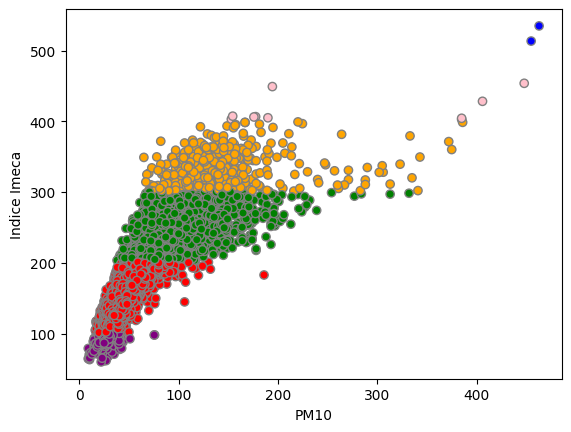

LinearDiscriminantAnalysis()


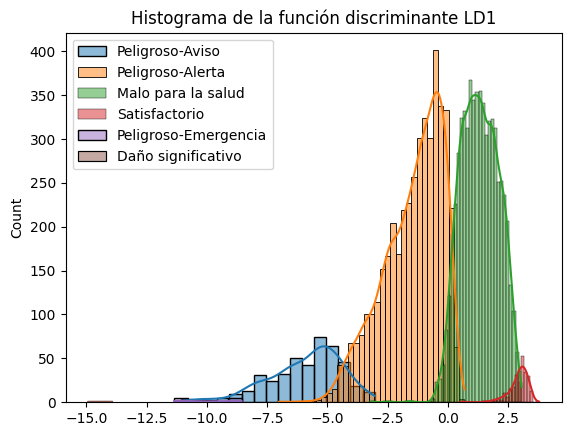

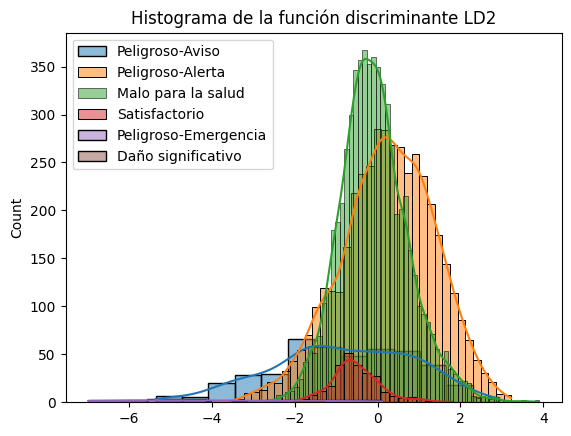

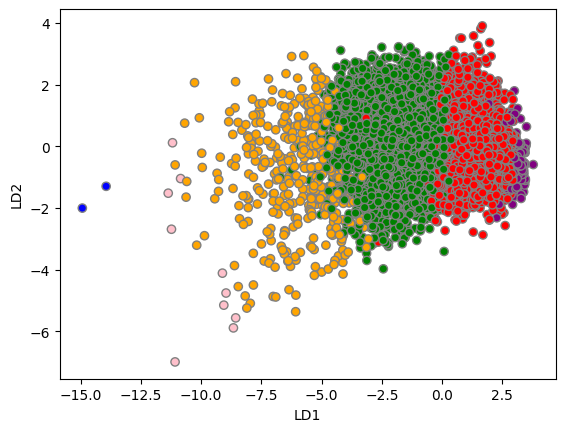

IMECA                 Daño significativo  Malo para la salud  \
row_0                                                          
Daño significativo                     2                   0   
Malo para la salud                     0                6206   
Peligroso-Alerta                       0                  59   
Peligroso-Aviso                        0                   0   
Peligroso-Emergencia                   0                   0   
Satisfactorio                          0                   0   

IMECA                 Peligroso-Alerta  Peligroso-Aviso  Peligroso-Emergencia  \
row_0                                                                           
Daño significativo                   0                3                     4   
Malo para la salud                 585                0                     0   
Peligroso-Alerta                  3651               24                     0   
Peligroso-Aviso                     91              387                     2   
P

In [35]:
discriminant_analysis(database)

**Analsis Factorial**

In [36]:
print(database_robust_scaled.iloc[:,0:15].isnull().sum())  # Verificar valores faltantes
print(database_robust_scaled.iloc[:,0:15].var())  # Verificar varianza de cada columna


CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64
CO       0.723312
NO       3.067752
NO2      0.609723
NOX      0.877880
O3       0.583849
PM10     0.890353
PM2.5    0.716057
PRS      0.747257
RAINF    0.000000
RH       0.397361
SO2      0.931151
SR       0.582475
TOUT     0.579193
WSR      0.452030
WDR      1.534136
dtype: float64


In [37]:
database_robust_scaled.drop(columns='RAINF').iloc[:,0:14]

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RH,SO2,SR,TOUT,WSR,WDR
0,1.227273,-0.016949,2.054422,1.399038,-0.346154,2.027027,4.145946,-1.309524,-0.15625,0.172414,-0.070130,-0.275967,-0.793103,2.800000
1,0.806818,-0.118644,1.238095,0.798077,-0.192308,2.216216,5.443844,-1.380952,-0.09375,0.448276,-0.070130,-0.330957,-0.810345,2.685714
2,0.534091,-0.118644,0.877551,0.543269,-0.115385,1.567568,4.233634,-1.404762,-0.15625,0.344828,-0.070130,-0.362525,-0.362069,2.314286
3,0.034091,-0.135593,0.115646,0.000000,-0.076923,0.324324,1.023423,-1.452381,-0.43750,0.034483,-0.070130,-0.410387,-0.637931,2.342857
4,-0.125000,-0.118644,-0.081633,-0.139423,-0.115385,0.000000,0.266066,-1.357143,-0.62500,-0.068966,-0.070130,-0.298371,-0.500000,2.157143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11302,-1.079545,0.000000,-0.265306,-0.230769,0.500000,-0.297297,-0.523123,-0.500000,-1.00000,-0.448276,0.007792,1.238289,1.224138,-0.042857
11303,-1.056818,-0.118644,-0.047619,-0.110577,0.269231,-0.405405,-0.599399,-0.404762,-0.93750,-0.758621,-0.064935,1.120163,0.896552,0.128571
11304,-1.034091,-0.152542,0.068027,-0.038462,0.076923,-0.324324,-0.523123,-0.285714,-0.90625,-0.793103,-0.070130,1.033605,0.120690,0.414286
11305,-1.022727,-0.186441,-0.190476,-0.225962,0.153846,-0.297297,-0.615616,-0.190476,-0.81250,-0.827586,-0.070130,0.970468,0.137931,0.571429


c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO: 0.6425509409999735
Test de Bartlett: chi-square = 191683.30160800152, p-value = 0.0


 PCA :

[[ 0.10353629  0.14323517  0.10590874 -0.06175387 -0.50551624]
 [ 0.74012578  0.02610728 -0.2293566  -0.3976839   0.32938181]
 [ 0.27861795  0.02349162  0.07570947  0.2133947  -0.14927965]
 [ 0.40698277  0.02410516 -0.01175985  0.03761427 -0.01171089]
 [-0.14398034  0.38029044  0.07278691  0.04320098  0.23746665]
 [ 0.1984683   0.37039109  0.18452756  0.15566191 -0.21012457]
 [ 0.22195467  0.24419811  0.14404702  0.09042464 -0.35754548]
 [ 0.04945164 -0.25048627 -0.3499114   0.46317992  0.23145937]
 [ 0.04108079 -0.23675813 -0.13469894 -0.08238638 -0.28668602]
 [ 0.13574304  0.2791793   0.01325404  0.62300533  0.16078078]
 [-0.01302218  0.38817331 -0.00782382  0.01181304  0.28109624]
 [-0.1350223   0.31503733  0.17524075 -0.35930706  0.11700072]
 [-0.15925428  0.22329912 -0.02232318 -0.11533941  0.21973267]
 [ 0.15008483 -0.37376154  0.83557432  0.06931947  0.28732977]]


 Unrotated FA :


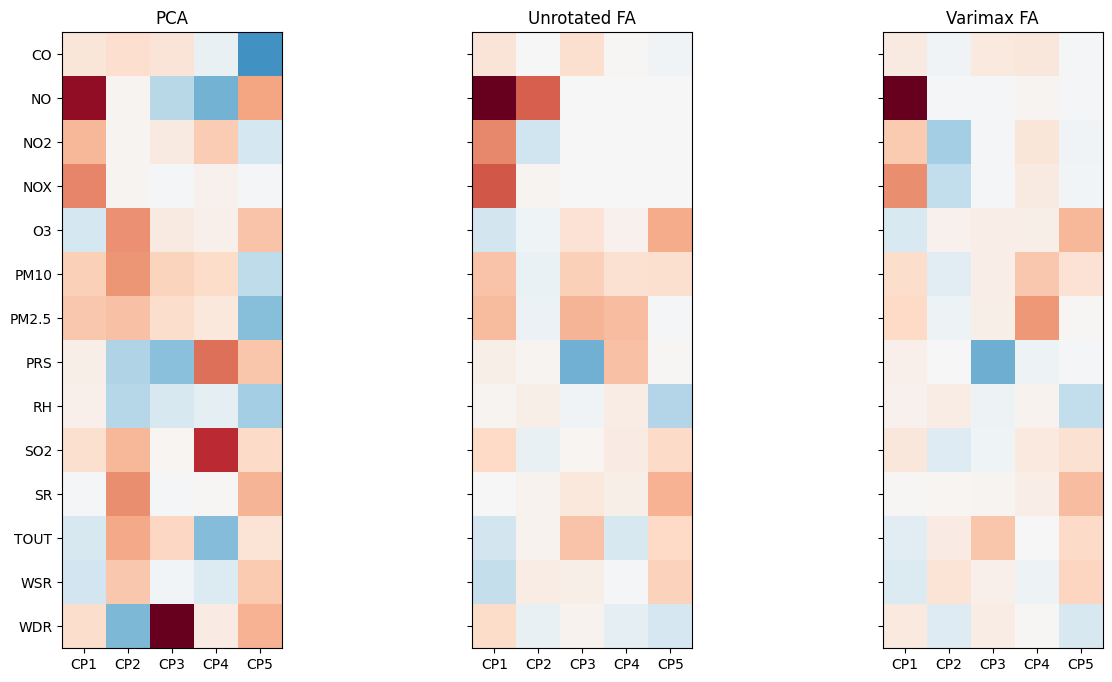

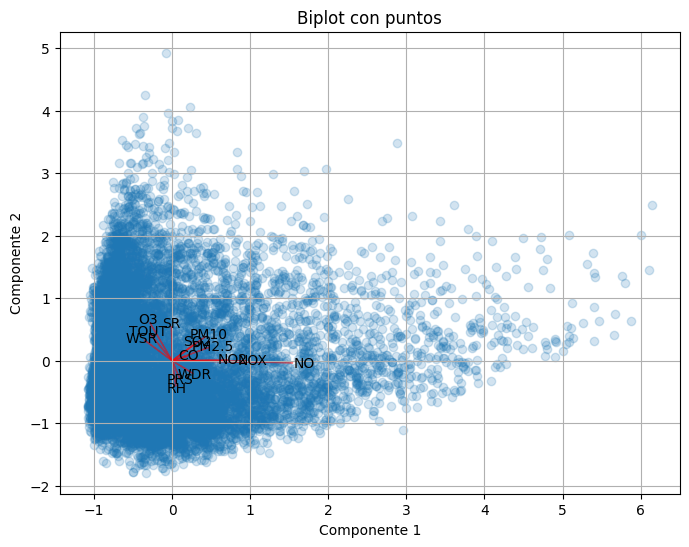

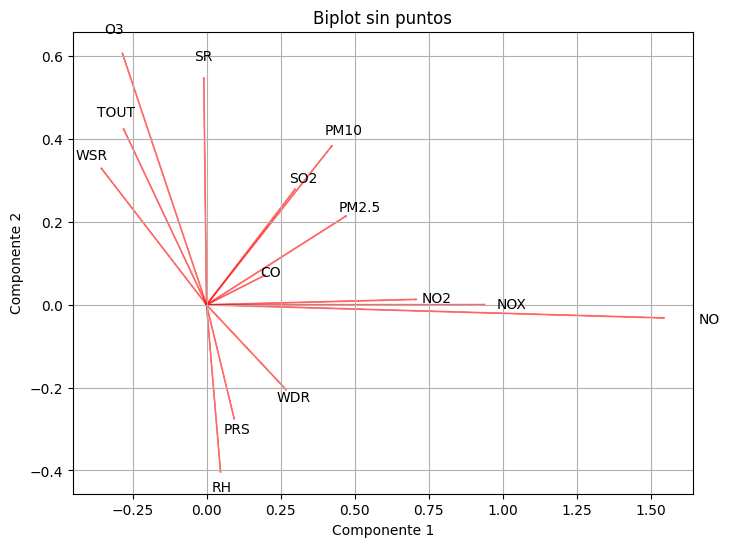

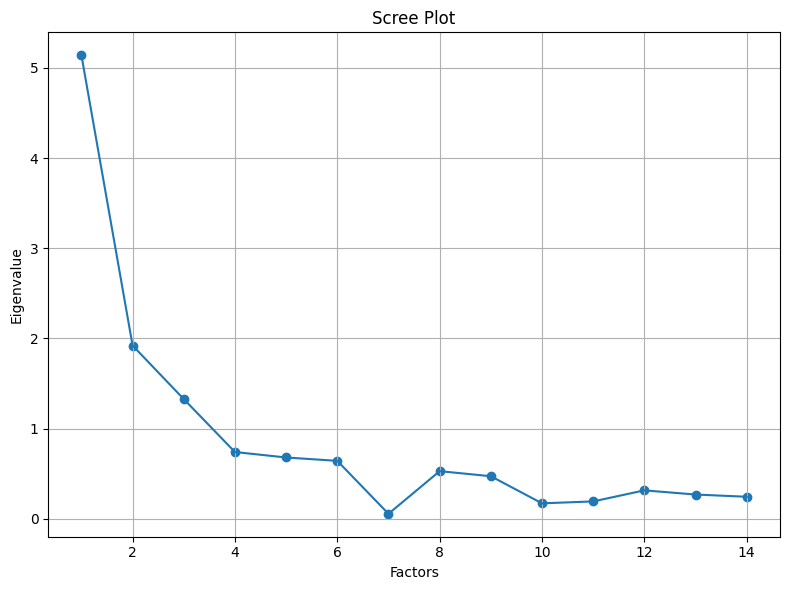

In [38]:
# Aplicacion del analisis factorial
factor_analysis(database_robust_scaled.drop(columns='RAINF').iloc[:,0:14], n_components=5)

**Regresión Multiple**

In [39]:
database_robust_scaled.isnull().sum()

CO                0
NO                0
NO2               0
NOX               0
O3                0
PM10              0
PM2.5             0
PRS               0
RAINF             0
RH                0
SO2               0
SR                0
TOUT              0
WSR               0
WDR               0
IndiceIMECA    2503
IMECA          2503
dtype: int64

In [40]:
database_robust_scaled.iloc[:,15]

0        326.291148
1        344.189758
2        312.585784
3               NaN
4               NaN
            ...    
11302           NaN
11303           NaN
11304    188.622340
11305           NaN
11306           NaN
Name: IndiceIMECA, Length: 11307, dtype: float64

In [41]:
database_robust_scaled.iloc[:,0:8]

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS
0,1.227273,-0.016949,2.054422,1.399038,-0.346154,2.027027,4.145946,-1.309524
1,0.806818,-0.118644,1.238095,0.798077,-0.192308,2.216216,5.443844,-1.380952
2,0.534091,-0.118644,0.877551,0.543269,-0.115385,1.567568,4.233634,-1.404762
3,0.034091,-0.135593,0.115646,0.000000,-0.076923,0.324324,1.023423,-1.452381
4,-0.125000,-0.118644,-0.081633,-0.139423,-0.115385,0.000000,0.266066,-1.357143
...,...,...,...,...,...,...,...,...
11302,-1.079545,0.000000,-0.265306,-0.230769,0.500000,-0.297297,-0.523123,-0.500000
11303,-1.056818,-0.118644,-0.047619,-0.110577,0.269231,-0.405405,-0.599399,-0.404762
11304,-1.034091,-0.152542,0.068027,-0.038462,0.076923,-0.324324,-0.523123,-0.285714
11305,-1.022727,-0.186441,-0.190476,-0.225962,0.153846,-0.297297,-0.615616,-0.190476


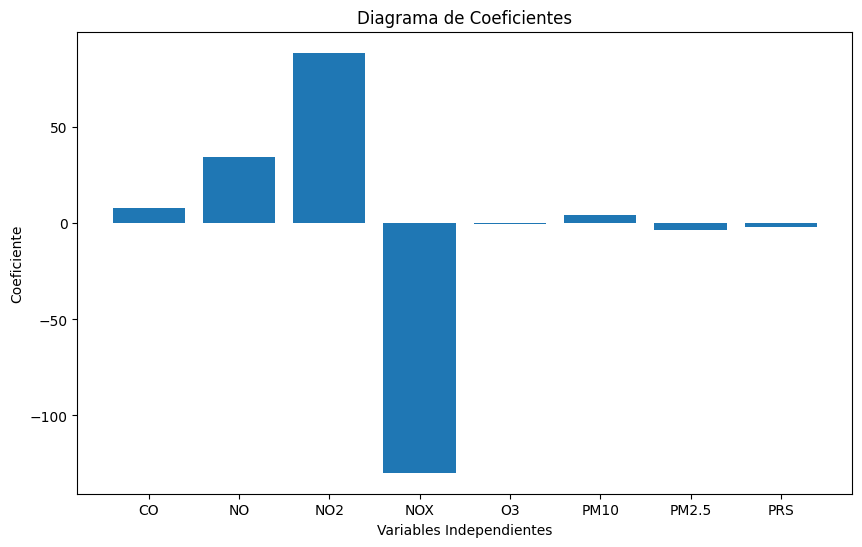

(array([ 8.05934383e+00,  3.46731569e+01,  8.88636428e+01, -1.29833657e+02,
        -8.63004036e-02,  4.43548129e+00, -3.31542893e+00, -2.05758131e+00]),
 0.025978491831383677,
              CO        NO       NO2       NOX        O3      PM10     PM2.5  \
 7411   0.579545  2.016949  1.496599  1.586538 -0.730769 -0.054054  0.532132   
 8028   0.761364  2.728814  0.442177  1.043269 -0.769231  0.675676  1.393393   
 6164  -0.659091  0.779661  0.251701  0.360577  0.346154  0.027027 -0.839039   
 1792   0.795455 -0.152542  0.448980  0.230769 -0.500000  0.621622  0.633033   
 2209   0.579545  0.644068  0.578231  0.548077  0.884615  0.945946  1.064865   
 ...         ...       ...       ...       ...       ...       ...       ...   
 1166  -0.204545 -0.118644 -0.210884 -0.225962 -0.384615  0.081081  0.831832   
 8655   1.965909  0.033898 -0.326531 -0.264423 -0.269231 -1.027027 -0.839640   
 2831   1.659091 -0.135593 -0.591837 -0.500000 -0.038462  0.189189  0.743544   
 10781 -0.272727 -0.135

In [42]:
database_robust_scaled = database_robust_scaled.dropna()
RLM(database_robust_scaled)

c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\isaac\AppData\Local\Temp\ipykernel_4340\414963568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Prediccion"]=model_kmeans.labels_


,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,IndiceIMECA,IMECA,Prediccion
0,1.227273,-0.016949,2.054422,1.399038,-0.346154,2.027027,4.145946,-1.309524,0.0,-0.15625,0.172414,-0.070130,-0.275967,-0.793103,2.800000,326.291148,Peligroso-Aviso,3
1,0.806818,-0.118644,1.238095,0.798077,-0.192308,2.216216,5.443844,-1.380952,0.0,-0.09375,0.448276,-0.070130,-0.330957,-0.810345,2.685714,344.189758,Peligroso-Aviso,3
2,0.534091,-0.118644,0.877551,0.543269,-0.115385,1.567568,4.233634,-1.404762,0.0,-0.15625,0.344828,-0.070130,-0.362525,-0.362069,2.314286,312.585784,Peligroso-Aviso,4
6,-0.147727,0.508475,0.122449,0.192308,-0.423077,-0.189189,-0.693694,-1.142857,0.0,-0.75000,-0.310345,0.028571,-0.068228,-0.655172,0.371429,227.370158,Peligroso-Alerta,5
7,0.068182,2.288136,0.598639,1.028846,-0.461538,-0.135135,-0.731532,-1.000000,0.0,-0.87500,-0.241379,0.246753,0.351324,-0.603448,1.100000,187.660261,Malo para la salud,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,-0.920455,0.169492,-0.360544,-0.250000,1.076923,0.783784,-0.075676,-0.047619,0.0,-0.75000,-0.241379,2.277922,1.101833,1.482759,-0.142857,180.757565,Malo para la salud,1
11297,-0.965909,0.084746,-0.578231,-0.423077,0.846154,0.459459,-0.294294,-0.142857,0.0,-0.84375,-0.310345,2.277922,1.192464,1.431034,-0.242857,166.228752,Malo para la salud,6
11298,-1.000000,0.016949,-0.625850,-0.480769,0.846154,0.108108,-0.380180,-0.285714,0.0,-0.90625,-0.517241,2.088312,1.248473,1.568966,-0.171429,171.054181,Malo para la salud,1
11299,-1.045455,0.050847,-0.544218,-0.408654,0.923077,0.081081,-0.377177,-0.380952,0.0,-1.00000,-0.344828,1.742857,1.322811,1.603448,-0.142857,176.681039,Malo para la salud,1


c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

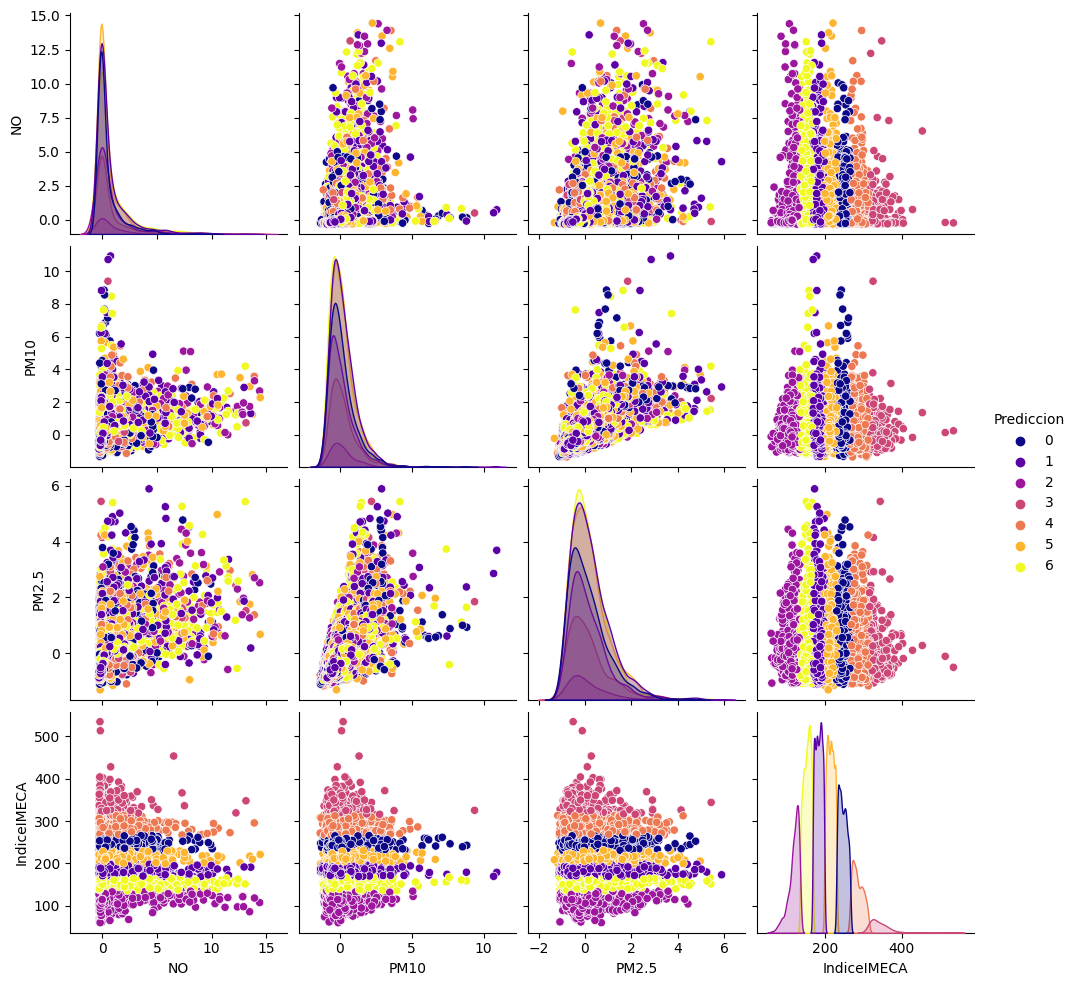

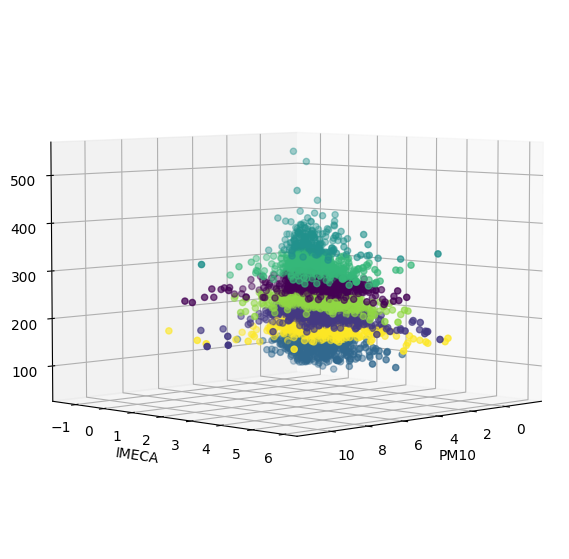

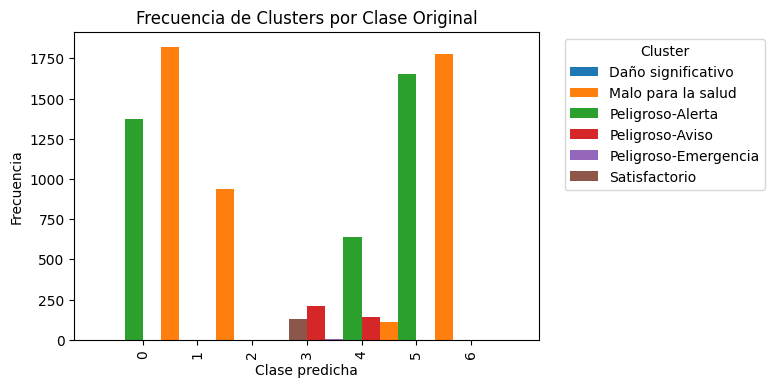

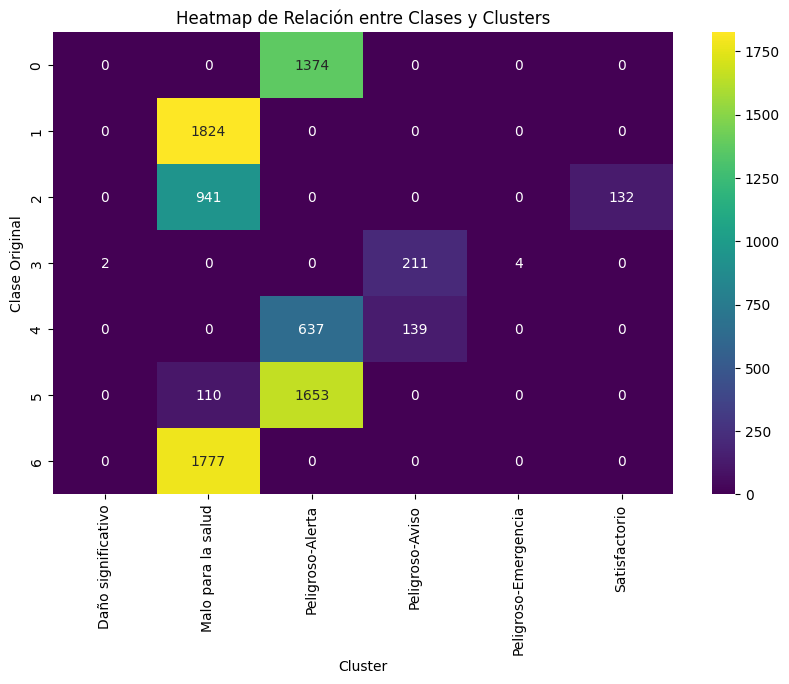

C:\Users\isaac\AppData\Local\Temp\ipykernel_4340\414963568.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["IMECA"]=datos['IMECA'].replace(dict_clases)


'Silhouette: 0.4286068912936462 - Calinski-Harabasz: 6299.836364621996'

In [43]:
clustering(database_robust_scaled)

In [45]:
database_robust_scaled.to_csv('obispado_imeca.csv')